# Part d: regression on 1Dim ising modellusing a multilayer perceptron (neural network)

In [23]:
import numpy as np
import scipy.sparse as sp
np.random.seed(12)

import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

from model_comparison import model_comparison
from resample import resample
import algorithms
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


from annCopy import NeuralNetMLP
from utils import train_test_split
%matplotlib inline

In [2]:
### define Ising model aprams
# system size
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)

"""
Comparing to project 1 - x = states, z = energies... 
Currently no y since we are in one dimension. 

"""

'\nComparing to project 1 - x = states, z = energies... \nCurrently no y since we are in one dimension. \n\n'

In [3]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2])) 
# build final data set
Data=[states,energies]

# define number of samples
n_samples=600
# define train and test data sets


In [4]:
X=Data[0]
Y=Data[1]

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, split_size=0.5)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((5000, 1600), (5000,), (5000, 1600), (5000,))

# Two layer MLP (Neural network )

In [6]:
# Experimental setup
metric = []

eta = [0.0001, 0.001, 0.01, 0.1]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

for e in eta:
    for l in lmd:
        ann = NeuralNetMLP(l2 = l, 
                           batch_size=10, 
                           epochs=50, 
                           n_hidden=30,
                           eta = e)

        ann.fit(X_train, y_train, X_valid, y_valid)
        ann.predict(X_valid)
        # returns a list of the mean mse score for different epochs or batches
        metric.append(ann.eval_["valid_preform"])
        print(" for lmd "+str(l) + " and eta: " + str(e) + "   performance is " + str(np.mean(ann.eval_["valid_preform"])))

 for lmd 0.0001 and eta: 0.0001   performance is 76.8301900296
 for lmd 0.001 and eta: 0.0001   performance is 76.5607998985
 for lmd 0.01 and eta: 0.0001   performance is 77.2798124
 for lmd 0.1 and eta: 0.0001   performance is 76.0171951938
 for lmd 1.0 and eta: 0.0001   performance is 76.2432306143
 for lmd 10 and eta: 0.0001   performance is 75.4886313438
 for lmd 0.0001 and eta: 0.001   performance is 77.3805135534
 for lmd 0.001 and eta: 0.001   performance is 76.7718141797
 for lmd 0.01 and eta: 0.001   performance is 76.7237673755
 for lmd 0.1 and eta: 0.001   performance is 76.8132912768
 for lmd 1.0 and eta: 0.001   performance is 77.1245094291
 for lmd 10 and eta: 0.001   performance is 75.7161091732
 for lmd 0.0001 and eta: 0.01   performance is 39.9645709405
 for lmd 0.001 and eta: 0.01   performance is 40.7106466034
 for lmd 0.01 and eta: 0.01   performance is 69.7773884351
 for lmd 0.1 and eta: 0.01   performance is 40.1673801311
 for lmd 1.0 and eta: 0.01   performance 

In [28]:
av = np.average(metric, axis = 1)

In [29]:
av

array([  7.68301900e+01,   7.65607999e+01,   7.72798124e+01,
         7.60171952e+01,   7.62432306e+01,   7.54886313e+01,
         7.73805136e+01,   7.67718142e+01,   7.67237674e+01,
         7.68132913e+01,   7.71245094e+01,   7.57161092e+01,
         3.99645709e+01,   4.07106466e+01,   6.97773884e+01,
         4.01673801e+01,   3.99898687e+01,   3.99582047e+01,
         3.81483184e+12,   3.36899490e+13,   2.37928792e+14,
         7.83869724e+15,   4.40778871e+01,   4.29838237e+01])

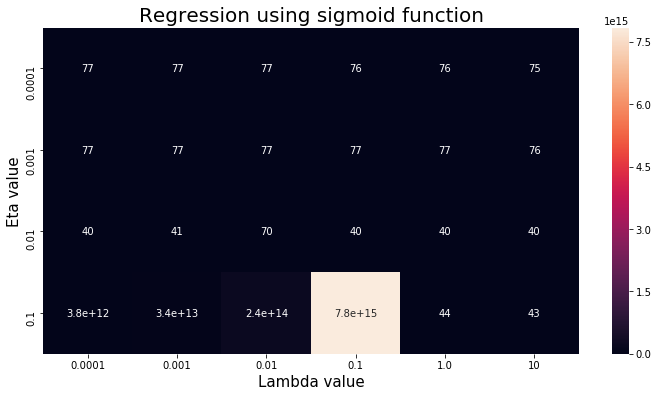

In [31]:
m = np.array(av).reshape((len(eta), len(lmd)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=lmd, yticklabels=eta)
ax.set_title("Regression using sigmoid function", fontsize = 20)
ax.set_xlabel("Lambda value", fontsize = 15)
ax.set_ylabel("Eta value", fontsize = 15) #
plt.savefig("./results/figures/regression_ridge_nn_sigmoid.png")

In [30]:
# Experimental setup
metric = []

eta = [0.0001, 0.001, 0.01, 0.1]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

for e in eta:
    for l in lmd:
        ann = NeuralNetMLP(l2 = l, 
                           batch_size=10, 
                           epochs=100, 
                           n_hidden=30,
                           eta = e)

        ann.fit(X_train, y_train, X_valid, y_valid)
        ann.predict(X_valid)
        # returns a list of the mean mse score for different epochs or batches
        metric.append(ann.eval_["valid_preform"])
        print(" for lmd "+str(l) + " and eta: " + str(e) + "   performance is " + str(np.mean(ann.eval_["valid_preform"])))

 for lmd 0.0001 and eta: 0.0001   performance is 77.2777936113
 for lmd 0.001 and eta: 0.0001   performance is 77.1485752647
 for lmd 0.01 and eta: 0.0001   performance is 77.9733257154
 for lmd 0.1 and eta: 0.0001   performance is 77.2403558132
 for lmd 1.0 and eta: 0.0001   performance is 77.0638973195
 for lmd 10 and eta: 0.0001   performance is 76.2823203525
 for lmd 0.0001 and eta: 0.001   performance is 77.5262170763
 for lmd 0.001 and eta: 0.001   performance is 77.1906368502
 for lmd 0.01 and eta: 0.001   performance is 76.6808972353
 for lmd 0.1 and eta: 0.001   performance is 77.3126474715
 for lmd 1.0 and eta: 0.001   performance is 76.7301287224
 for lmd 10 and eta: 0.001   performance is 76.3749417083
 for lmd 0.0001 and eta: 0.01   performance is 39.9792998052
 for lmd 0.001 and eta: 0.01   performance is 40.4406054686
 for lmd 0.01 and eta: 0.01   performance is 40.0362678835
 for lmd 0.1 and eta: 0.01   performance is 40.0551421053
 for lmd 1.0 and eta: 0.01   performan

# Comparing to scikitlearn MLPregression

In [32]:
from sklearn.neural_network import MLPRegressor

In [35]:
mlp = MLPRegressor(max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)

np.sum(np.square(y_pred - y_valid))/len(y_pred)

0.77051466685090109

In [34]:
y_pred

array([ -3.28140201,   3.64353631,  11.10142951, ...,  -5.66985956,
         0.46970918,   8.02716027])